In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [116]:
df = pd.read_csv('train.csv',index_col=0)

test_df = pd.read_csv('test.csv', index_col=0)

In [117]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [119]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [120]:
# we are missing cabin info so lets drop





In [121]:
df = df.drop('Cabin', axis=1)

In [122]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [123]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [124]:
df.corr()['Survived'].sort_values()

Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

In [125]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

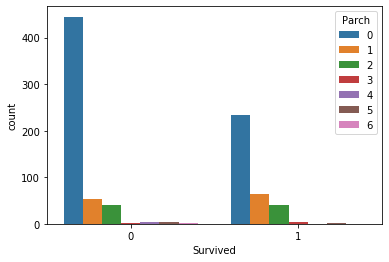

In [126]:
# now we can combine 2,3,4,5,6 into 2

sns.countplot(x='Survived', data=df, hue='Parch')

In [127]:
def func(x):
    if x>2:
        return 2
    else :
        return x

In [128]:
df['Parch'] = df['Parch'].apply(lambda x: func(x))

In [129]:
df['Parch'].value_counts()

0    678
1    118
2     95
Name: Parch, dtype: int64

In [130]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

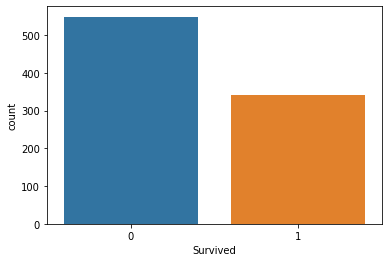

In [131]:
sns.countplot(df['Survived'])

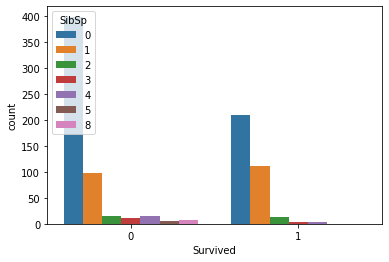

In [132]:
sns.countplot(x='Survived', data=df, hue='SibSp')

In [133]:
df['SibSp'] = df['SibSp'].apply(lambda x: func(x))

In [134]:
df['SibSp'].value_counts()

0    608
1    209
2     74
Name: SibSp, dtype: int64

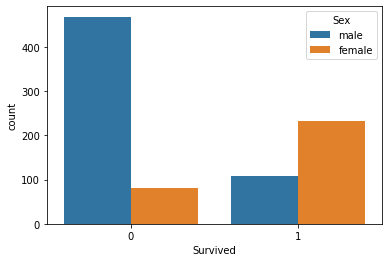

In [135]:
sns.countplot(x='Survived', data=df, hue='Sex')

In [136]:
df['Sex'] = df['Sex'].map({'female':1, 'male':0})

In [137]:
df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [138]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [139]:
df = df.drop(['Ticket'], axis=1)
df = df.drop(['Name'], axis=1)

In [140]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,S
2,1,1,1,38.0,1,0,71.2833,C
3,1,3,1,26.0,0,0,7.9250,S
4,1,1,1,35.0,1,0,53.1000,S
5,0,3,0,35.0,0,0,8.0500,S


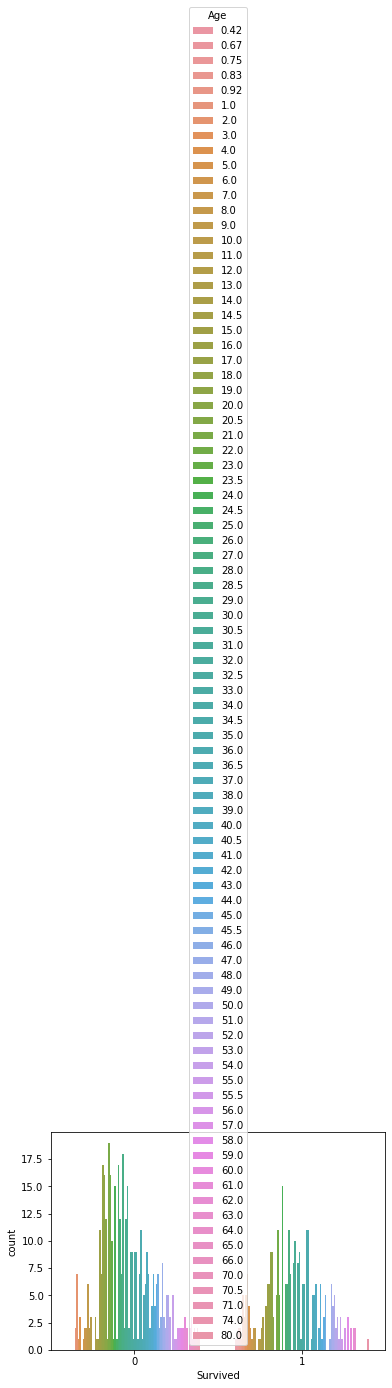

In [141]:
sns.countplot(x='Survived', data=df, hue='Age')

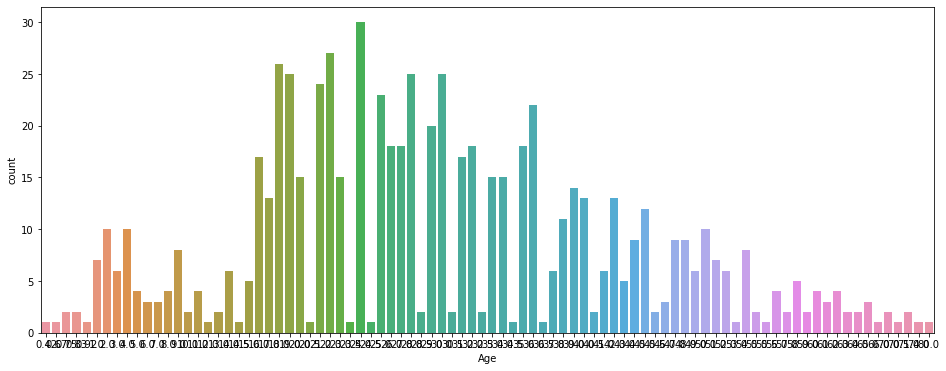

In [142]:
plt.figure(figsize=(16,6))
sns.countplot(x='Age',data=df)


In [143]:
df['Age'].nunique()

88

In [144]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [145]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [146]:
df.corr()['Age']

Survived   -0.077221
Pclass     -0.369226
Sex        -0.093254
Age         1.000000
SibSp      -0.251129
Parch      -0.282007
Fare        0.096067
Name: Age, dtype: float64

In [147]:
df[df['Pclass']==1]['Age'].describe()

count    186.000000
mean      38.233441
std       14.802856
min        0.920000
25%       27.000000
50%       37.000000
75%       49.000000
max       80.000000
Name: Age, dtype: float64

In [148]:
df[df['Pclass']==2]['Age'].describe()

count    173.000000
mean      29.877630
std       14.001077
min        0.670000
25%       23.000000
50%       29.000000
75%       36.000000
max       70.000000
Name: Age, dtype: float64

In [149]:
df[df['Pclass']==3]['Age'].describe()

count    355.000000
mean      25.140620
std       12.495398
min        0.420000
25%       18.000000
50%       24.000000
75%       32.000000
max       74.000000
Name: Age, dtype: float64

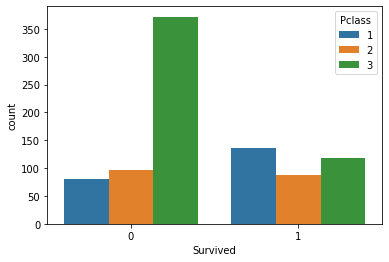

In [150]:
sns.countplot(x='Survived', data=df, hue='Pclass')

In [151]:
dummies = pd.get_dummies(df['Pclass'], drop_first=True)

In [152]:
df = pd.concat([df.drop('Pclass', axis=1), dummies], axis=1
              )

In [153]:
mean_age = df['Age'].mean()

df['Age'].fillna(mean_age, inplace=True)



df= df.dropna()

df.isnull().sum()

Survived    0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
2           0
3           0
dtype: int64

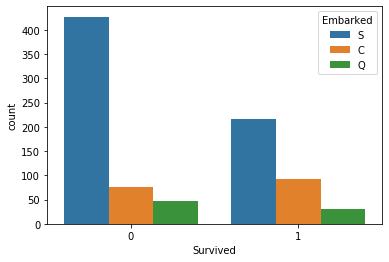

In [154]:
sns.countplot(x='Survived', data=df, hue='Embarked')

In [155]:
df.corr()['Survived'].sort_values()

3          -0.320171
Age        -0.074673
SibSp       0.056121
2           0.095002
Parch       0.122822
Fare        0.255290
Sex         0.541585
Survived    1.000000
Name: Survived, dtype: float64

In [156]:
emb_dummies = pd.get_dummies(df['Embarked'], drop_first=True)

In [157]:
df = pd.concat([df.drop('Embarked',axis=1), emb_dummies], axis=1)

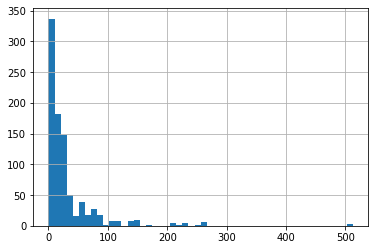

In [158]:
df['Fare'].hist(bins=50)

In [159]:
df['Fare'].nunique()

247

In [160]:
df.head()



,Survived,Sex,Age,SibSp,Parch,Fare,2,3,Q,S
PassengerId,,,,,,,,,,
1,0,0,22.0,1,0,7.2500,0,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0,0
3,1,1,26.0,0,0,7.9250,0,1,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,1
5,0,0,35.0,0,0,8.0500,0,1,0,1


In [161]:
X = df.drop('Survived', axis=1).values
y=df['Survived'].values

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_cval, y_train, y_cval = train_test_split(X, y, test_size=0.3, random_state=69)

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_cval)


array([[0.        , 0.48479517, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.33400352, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.62302086, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.67328474, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.25860769, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.2083438 , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [164]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [165]:
model = Sequential()

model.add(Dense(units=8, activation='relu'))



model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)

In [166]:
model.fit(x=X_train,y=y_train, validation_data=(X_cval, y_cval), epochs=1000, verbose=1, callbacks=[early_stop] )

Train on 622 samples, validate on 267 samples
Epoch 1/1000
622/622 [==============================] - 0s 624us/sample - loss: 1.8845 - val_loss: 1.4822
Epoch 2/1000
622/622 [==============================] - 0s 83us/sample - loss: 1.7156 - val_loss: 1.3693
Epoch 3/1000
622/622 [==============================] - 0s 77us/sample - loss: 1.5634 - val_loss: 1.2562
Epoch 4/1000
622/622 [==============================] - 0s 64us/sample - loss: 1.4138 - val_loss: 1.1524
Epoch 5/1000
622/622 [==============================] - 0s 78us/sample - loss: 1.2837 - val_loss: 1.0640
Epoch 6/1000
622/622 [==============================] - 0s 103us/sample - loss: 1.1623 - val_loss: 0.9676
Epoch 7/1000
622/622 [==============================] - 0s 66us/sample - loss: 1.0440 - val_loss: 0.8887
Epoch 8/1000
622/622 [==============================] - 0s 77us/sample - loss: 0.9564 - val_loss: 0.8269
Epoch 9/1000
622/622 [==============================] - 0s 90us/sample - loss: 0.8871 - val_loss: 0.7690
Epoch 1

Epoch 78/1000
622/622 [==============================] - 0s 67us/sample - loss: 0.4906 - val_loss: 0.4563
Epoch 79/1000
622/622 [==============================] - 0s 79us/sample - loss: 0.4898 - val_loss: 0.4505
Epoch 80/1000
622/622 [==============================] - 0s 69us/sample - loss: 0.4879 - val_loss: 0.4585
Epoch 81/1000
622/622 [==============================] - 0s 80us/sample - loss: 0.4888 - val_loss: 0.4511
Epoch 82/1000
622/622 [==============================] - 0s 91us/sample - loss: 0.4871 - val_loss: 0.4565
Epoch 83/1000
622/622 [==============================] - 0s 64us/sample - loss: 0.4885 - val_loss: 0.4590
Epoch 84/1000
622/622 [==============================] - 0s 92us/sample - loss: 0.4940 - val_loss: 0.4526
Epoch 85/1000
622/622 [==============================] - 0s 72us/sample - loss: 0.4852 - val_loss: 0.4575
Epoch 86/1000
622/622 [==============================] - 0s 88us/sample - loss: 0.4893 - val_loss: 0.4544
Epoch 87/1000
622/622 [=======================

Epoch 155/1000
622/622 [==============================] - 0s 83us/sample - loss: 0.4669 - val_loss: 0.4367
Epoch 156/1000
622/622 [==============================] - 0s 90us/sample - loss: 0.4671 - val_loss: 0.4396
Epoch 157/1000
622/622 [==============================] - 0s 72us/sample - loss: 0.4664 - val_loss: 0.4368
Epoch 158/1000
622/622 [==============================] - 0s 79us/sample - loss: 0.4693 - val_loss: 0.4408
Epoch 159/1000
622/622 [==============================] - 0s 68us/sample - loss: 0.4674 - val_loss: 0.4378
Epoch 160/1000
622/622 [==============================] - 0s 80us/sample - loss: 0.4689 - val_loss: 0.4358
Epoch 161/1000
622/622 [==============================] - 0s 54us/sample - loss: 0.4672 - val_loss: 0.4425
Epoch 162/1000
622/622 [==============================] - 0s 81us/sample - loss: 0.4689 - val_loss: 0.4354
Epoch 163/1000
622/622 [==============================] - 0s 93us/sample - loss: 0.4684 - val_loss: 0.4409
Epoch 164/1000
622/622 [=============

622/622 [==============================] - 0s 77us/sample - loss: 0.4604 - val_loss: 0.4265
Epoch 308/1000
622/622 [==============================] - 0s 77us/sample - loss: 0.4535 - val_loss: 0.4304
Epoch 309/1000
622/622 [==============================] - 0s 77us/sample - loss: 0.4569 - val_loss: 0.4346
Epoch 310/1000
622/622 [==============================] - 0s 77us/sample - loss: 0.4551 - val_loss: 0.4235
Epoch 311/1000
622/622 [==============================] - 0s 90us/sample - loss: 0.4505 - val_loss: 0.4289
Epoch 312/1000
622/622 [==============================] - 0s 77us/sample - loss: 0.4533 - val_loss: 0.4351
Epoch 313/1000
622/622 [==============================] - 0s 77us/sample - loss: 0.4549 - val_loss: 0.4279
Epoch 314/1000
622/622 [==============================] - 0s 77us/sample - loss: 0.4514 - val_loss: 0.4343
Epoch 315/1000
622/622 [==============================] - 0s 64us/sample - loss: 0.4512 - val_loss: 0.4261
Epoch 316/1000
622/622 [============================

In [167]:
model_loss = pd.DataFrame(model.history.history)

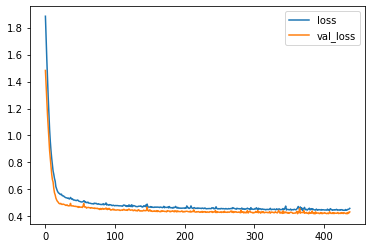

In [168]:
model_loss.plot()

In [169]:
from sklearn.metrics import confusion_matrix, classification_report

In [170]:
predictions = model.predict_classes(X_cval)


In [171]:
print(confusion_matrix(y_cval, predictions))
print('\n')
print(classification_report(y_cval, predictions))

[[140  36]
 [ 21  70]]


              precision    recall  f1-score   support

           0       0.87      0.80      0.83       176
           1       0.66      0.77      0.71        91

    accuracy                           0.79       267
   macro avg       0.76      0.78      0.77       267
weighted avg       0.80      0.79      0.79       267



In [172]:
from sklearn.svm import SVC

In [173]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [174]:
svc.predict(X_cval)

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [175]:
predictions = svc.predict(X_cval)


In [176]:
print(confusion_matrix(y_cval, predictions))
print('\n')
print(classification_report(y_cval, predictions))

[[157  19]
 [ 59  32]]


              precision    recall  f1-score   support

           0       0.73      0.89      0.80       176
           1       0.63      0.35      0.45        91

    accuracy                           0.71       267
   macro avg       0.68      0.62      0.63       267
weighted avg       0.69      0.71      0.68       267



In [177]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

In [178]:
log.fit(X_train, y_train)


C:\Users\akshay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [179]:
predictions = log.predict(X_cval)

In [180]:
print(confusion_matrix(y_cval, predictions))
print('\n')
print(classification_report(y_cval, predictions))

[[160  16]
 [ 28  63]]


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       176
           1       0.80      0.69      0.74        91

    accuracy                           0.84       267
   macro avg       0.82      0.80      0.81       267
weighted avg       0.83      0.84      0.83       267



In [181]:
from sklearn.pipeline import Pipeline

In [316]:
test_df = pd.read_csv('test.csv',index_col=0)

In [317]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [318]:
test_df = test_df.drop(['Name', 'Ticket', 'Cabin' ], axis=1)

In [319]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [320]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

In [321]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [322]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [323]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,2,3,Q,S
PassengerId,,,,,,,,,,
1,0,0,22.0,1,0,7.2500,0,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0,0
3,1,1,26.0,0,0,7.9250,0,1,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,1
5,0,0,35.0,0,0,8.0500,0,1,0,1


In [324]:
test_emb_dummies = pd.get_dummies(test_df['Embarked'], drop_first=True)
test_class_dummies = pd.get_dummies(test_df['Pclass'], drop_first=True)
test_df = pd.concat([test_df.drop('Pclass',axis=1), test_class_dummies], axis=1)
test_df = pd.concat([test_df.drop('Embarked',axis=1), test_emb_dummies], axis=1)

In [325]:
test_df.head()

,Sex,Age,SibSp,Parch,Fare,2,3,Q,S
PassengerId,,,,,,,,,
892,male,34.5,0,0,7.8292,0,1,1,0
893,female,47.0,1,0,7.0000,0,1,0,1
894,male,62.0,0,0,9.6875,1,0,1,0
895,male,27.0,0,0,8.6625,0,1,0,1
896,female,22.0,1,1,12.2875,0,1,0,1


In [326]:
def func(x):
    if x>2:
        return 2
    else :
        return x

In [327]:
test_df['SibSp'] = test_df['SibSp'].apply(lambda x: func(x))

In [328]:
test_df['SibSp'].value_counts()

0    283
1    110
2     25
Name: SibSp, dtype: int64

In [329]:
test_df['Parch'] = test_df['Parch'].apply(lambda x: func(x))

In [330]:
test_df['Parch'].value_counts()

0    324
1     52
2     42
Name: Parch, dtype: int64

In [331]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,2,3,Q,S
PassengerId,,,,,,,,,,
1,0,0,22.0,1,0,7.2500,0,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0,0
3,1,1,26.0,0,0,7.9250,0,1,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,1
5,0,0,35.0,0,0,8.0500,0,1,0,1


In [332]:
test_df.head()

,Sex,Age,SibSp,Parch,Fare,2,3,Q,S
PassengerId,,,,,,,,,
892,male,34.5,0,0,7.8292,0,1,1,0
893,female,47.0,1,0,7.0000,0,1,0,1
894,male,62.0,0,0,9.6875,1,0,1,0
895,male,27.0,0,0,8.6625,0,1,0,1
896,female,22.0,1,1,12.2875,0,1,0,1


In [333]:
test_df['Sex'] = test_df['Sex'].map({'female':1, 'male':0})

In [334]:
test_df.head()

,Sex,Age,SibSp,Parch,Fare,2,3,Q,S
PassengerId,,,,,,,,,
892,0,34.5,0,0,7.8292,0,1,1,0
893,1,47.0,1,0,7.0000,0,1,0,1
894,0,62.0,0,0,9.6875,1,0,1,0
895,0,27.0,0,0,8.6625,0,1,0,1
896,1,22.0,1,1,12.2875,0,1,0,1


In [335]:
log.fit(X_train, y_train)


C:\Users\akshay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [336]:
predictions = log.predict(X_cval)

In [337]:
print(confusion_matrix(y_cval, predictions))
print('\n')
print(classification_report(y_cval, predictions))

[[160  16]
 [ 28  63]]


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       176
           1       0.80      0.69      0.74        91

    accuracy                           0.84       267
   macro avg       0.82      0.80      0.81       267
weighted avg       0.83      0.84      0.83       267



In [338]:
test_predictions = log.predict(test_df.values)

In [339]:
test_predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [340]:
test_output = pd.DataFrame(test_predictions, index=test_df.index, columns=['Survived'])

In [341]:
test_output.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [342]:
test_output['Survived'].value_counts()

0    269
1    149
Name: Survived, dtype: int64

In [250]:
test_output.to_csv('test_output.csv')

In [251]:
test_output = pd.read_csv('test_output.csv')

In [253]:
test_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [264]:
model = Sequential()

model.add(Dense(units=8, activation='relu'))



model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)

In [255]:
test_df.head()

,Sex,Age,SibSp,Parch,Fare,Q,S,2,3
PassengerId,,,,,,,,,
892,0,34.5,0,0,7.8292,1,0,0,1
893,1,47.0,1,0,7.0000,0,1,0,1
894,0,62.0,0,0,9.6875,1,0,1,0
895,0,27.0,0,0,8.6625,0,1,0,1
896,1,22.0,1,1,12.2875,0,1,0,1


In [343]:
X_test = scaler.transform(test_df)

In [344]:
test_predictions = log.predict(X_test)

In [345]:
test_output_4 = pd.DataFrame(test_predictions, index=test_df.index, columns=['Survived'])

In [346]:
test_output_4['Survived'].value_counts()

1    253
0    165
Name: Survived, dtype: int64

In [262]:
test_output_2.head()

,Survived
PassengerId,
892,1
893,1
894,1
895,0
896,1


In [263]:
test_output_2.to_csv('test_output_2.csv')

In [266]:
test_pred = model.predict_classes(X_test)

In [267]:
test_output_3 = pd.DataFrame(test_pred, index=test_df.index, columns=['Survived'])

In [268]:
test_output_3['Survived'].value_counts()

0    229
1    189
Name: Survived, dtype: int64

In [269]:
test_output_3.to_csv('test_output_3.csv')

In [270]:
test_df.head()

,Sex,Age,SibSp,Parch,Fare,Q,S,2,3
PassengerId,,,,,,,,,
892,0,34.5,0,0,7.8292,1,0,0,1
893,1,47.0,1,0,7.0000,0,1,0,1
894,0,62.0,0,0,9.6875,1,0,1,0
895,0,27.0,0,0,8.6625,0,1,0,1
896,1,22.0,1,1,12.2875,0,1,0,1


In [271]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,2,3,Q,S
PassengerId,,,,,,,,,,
1,0,0,22.0,1,0,7.2500,0,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0,0
3,1,1,26.0,0,0,7.9250,0,1,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,1
5,0,0,35.0,0,0,8.0500,0,1,0,1


In [348]:
test_output_4 = pd.DataFrame(test_predictions, index=test_df.index, columns=['Survived'])

In [349]:
test_output_4.to_csv('test_output_4.csv')